# CHRONIC KIDNEY DISEASE(CKD) PREDICTION

## 1.Project Overview
Chronic Kidney Disease (CKD) is a progressive condition characterized by the gradual loss of kidney function over time. The kidneys, responsible for filtering waste and excess fluids from the blood, become less effective, leading to the accumulation of toxins and imbalances in electrolytes, fluids, and hormones. CKD is often caused by underlying conditions such as diabetes and hypertension, which damage the kidneys’ delicate filtering units (nephrons).
It progresses through five stages, with Stage 1 being mild and Stage 5 indicating kidney failure, often requiring dialysis or transplantation. Early detection is critical, as symptoms like fatigue, swelling (edema), and poor appetite may not appear until significant damage has occurred.

This project aims to predict whether a patient has Chronic Kidney Disease based on various medical attributes. The dataset contains 400 patient records with 25 features, including age, blood pressure, specific gravity, albumin and more.
The project involves data preprocessing, exploratory data analysis(EDA), feaature engineering and model training using Random Forest Classifier.The performance of this model is evaluated using accuracy, classification report and confusion matrix.



## Table of Contents
1. [Project Overview](#Project-Overview)
2. [Data Loading and Initial Exploration](#data-loading-and-initial-exploration)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
5. [Feature Engineering](#feature-engineering)
6. [Model Training and Evaluation](#model-training-and-evaluation)
7. [Cross-Validation](#corss-validation)
8. [Conclusion](#conclusion)

## 2.Data Loading and Initial Exploration

In [191]:
# Import necessary libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

In [193]:
# Loading the CKD dataset and displaying the first 5 rows to understand the data structure
df=pd.read_csv(r"C:\Users\HP\Documents\python tt\kidney_disease.csv",index_col="id")
df.head()


,age,Blood_pressure,specific_gravity,albumin,Sugar,red_blood_cells,pus_cell,Pus_cell_clumps,Bacteria,Random_Blood_Glucose,...,Packed_cell_volume,White_blood_cell_count,Red_blood_cell_count,Hypertension,Diabetes_mellitus,Coronary_artery_disease,Appetite,Pedal_edema,Anemia,Class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## 3.Data Preprocessing

In [196]:
# Check the data types of the dataset
df.dtypes

age                        float64
Blood_pressure             float64
specific_gravity           float64
albumin                    float64
Sugar                      float64
red_blood_cells             object
pus_cell                    object
Pus_cell_clumps             object
Bacteria                    object
Random_Blood_Glucose       float64
Blood_Urea                 float64
Creatinine_clearance       float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed_cell_volume          object
White_blood_cell_count      object
Red_blood_cell_count        object
Hypertension                object
Diabetes_mellitus           object
Coronary_artery_disease     object
Appetite                    object
Pedal_edema                 object
Anemia                      object
Class                       object
dtype: object

It seems that some of the columns (Packed_cell_volumne, white_blood_cell and Red_blood_cell) have incorrect data types. Initially stored as 'object' (string) types, even though they contain numerical values.This issue could lead to errors during data analysis and model training

In [199]:
#Lets convert affected columns to numeric type and verify data types after conversion

df["Packed_cell_volume"]=pd.to_numeric(df["Packed_cell_volume"], errors="coerce")
df["White_blood_cell_count"]=pd.to_numeric(df["White_blood_cell_count"],errors="coerce")
df["Red_blood_cell_count"]=pd.to_numeric(df["Red_blood_cell_count"],errors="coerce")
df.dtypes

age                        float64
Blood_pressure             float64
specific_gravity           float64
albumin                    float64
Sugar                      float64
red_blood_cells             object
pus_cell                    object
Pus_cell_clumps             object
Bacteria                    object
Random_Blood_Glucose       float64
Blood_Urea                 float64
Creatinine_clearance       float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed_cell_volume         float64
White_blood_cell_count     float64
Red_blood_cell_count       float64
Hypertension                object
Diabetes_mellitus           object
Coronary_artery_disease     object
Appetite                    object
Pedal_edema                 object
Anemia                      object
Class                       object
dtype: object

In [201]:
# Check basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   Blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   Pus_cell_clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Random_Blood_Glucose     356 non-null    float64
 10  Blood_Urea               381 non-null    float64
 11  Creatinine_clearance     383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               348 no

In [203]:
#Check if there are any duplucate values
print("There are :", df.duplicated().sum(), 'duplicate values')

There are : 0 duplicate values


In [205]:
# Let's Check for missing values
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
Red_blood_cell_count       131
White_blood_cell_count     106
Potassium                   88
Sodium                      87
Packed_cell_volume          71
pus_cell                    65
Hemoglobin                  52
Sugar                       49
specific_gravity            47
albumin                     46
Random_Blood_Glucose        44
Blood_Urea                  19
Creatinine_clearance        17
Blood_pressure              12
age                          9
Bacteria                     4
Pus_cell_clumps              4
Hypertension                 2
Diabetes_mellitus            2
Coronary_artery_disease      2
Appetite                     1
Pedal_edema                  1
Anemia                       1
Class                        0
dtype: int64

The dataset seems to contain missing values

In [217]:
#separation of categorical columns from numerical columns we have to fill the null values first 

numerical_cols=[column for column in df.columns if df[column].dtype !="object"]

categorical_cols=[column for column in df.columns if df[column].dtype=="object"]

In [219]:
#Filling the missing numerical values with the mean and categorical values with the mode
df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols]=df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

#Let's check if all missing values have been filled
df.isnull().sum()

age                        0
Blood_pressure             0
specific_gravity           0
albumin                    0
Sugar                      0
red_blood_cells            0
pus_cell                   0
Pus_cell_clumps            0
Bacteria                   0
Random_Blood_Glucose       0
Blood_Urea                 0
Creatinine_clearance       0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed_cell_volume         0
White_blood_cell_count     0
Red_blood_cell_count       0
Hypertension               0
Diabetes_mellitus          0
Coronary_artery_disease    0
Appetite                   0
Pedal_edema                0
Anemia                     0
Class                      0
dtype: int64

-Missing values in numerical columns were filled with the mean of the respective column.
-Missing values in categorical columns were filled with the mode of the respective column.
-After filling the missing values we checked again to ensure no missing values remain.

In [221]:
#Lets check for the unique values of each numerical column
for column in numerical_cols:
    print(f"{column} has {df[column].unique()} values")

age has [48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.48337596 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.          5.         74.         38.         58.
 71.         34.         17.         12.         43.         41.
 57.          8.         39.         66.         81.         14.
 27.         83.         30.          4.          3.          6.
 32.         80.         49.         90.         78.         19.
  2.         33.         36.         37.         23.         25.
 20.         29.         28.         22.         79.        ] values
Blood_pressure has [ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         140.         180.


In [223]:
#let's check for the unique values in each categorical column
for column in categorical_cols:
    print(f"{column} has {df[column].unique()} values")

red_blood_cells has ['normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal'] values
Pus_cell_clumps has ['notpresent' 'present'] values
Bacteria has ['notpresent' 'present'] values
Hypertension has ['yes' 'no'] values
Diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes'] values
Coronary_artery_disease has ['no' 'yes' '\tno'] values
Appetite has ['good' 'poor'] values
Pedal_edema has ['no' 'yes'] values
Anemia has ['no' 'yes'] values
Class has ['ckd' 'ckd\t' 'notckd'] values


It seems like there are some inconsistencies and ambiguities in the categorical columns

In [226]:
#Let's standardize the columns with data inconsistencies as they can lead to errors during model training.
df["Diabetes_mellitus"]=df["Diabetes_mellitus"].replace(to_replace={' yes':'yes', '\tno':'no', '\tyes':'yes'})
df["Coronary_artery_disease"]=df["Coronary_artery_disease"].replace(to_replace={'\tno':'no'})
df["Class"]=df["Class"].replace(to_replace={'ckd\t':'ckd'})

In [228]:
for column in categorical_cols:
        print(f"{column} has {df[column].unique()} values")

red_blood_cells has ['normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal'] values
Pus_cell_clumps has ['notpresent' 'present'] values
Bacteria has ['notpresent' 'present'] values
Hypertension has ['yes' 'no'] values
Diabetes_mellitus has ['yes' 'no'] values
Coronary_artery_disease has ['no' 'yes'] values
Appetite has ['good' 'poor'] values
Pedal_edema has ['no' 'yes'] values
Anemia has ['no' 'yes'] values
Class has ['ckd' 'notckd'] values


After Cleaning, the unique values in the categorical columns are now consistent.

In [231]:
df.head()

,age,Blood_pressure,specific_gravity,albumin,Sugar,red_blood_cells,pus_cell,Pus_cell_clumps,Bacteria,Random_Blood_Glucose,...,Packed_cell_volume,White_blood_cell_count,Red_blood_cell_count,Hypertension,Diabetes_mellitus,Coronary_artery_disease,Appetite,Pedal_edema,Anemia,Class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


The age column needs to be an integer data type not a float data type

In [236]:
#Lets change the age column data type 
df["age"]=df["age"].astype(int)
df["age"].dtype

dtype('int32')

## 4.Exploratory Data Analysis(EDA)

In [239]:
#summary statistics

df.describe()

,age,Blood_pressure,specific_gravity,albumin,Sugar,Random_Blood_Glucose,Blood_Urea,Creatinine_clearance,Sodium,Potassium,Hemoglobin,Packed_cell_volume,White_blood_cell_count,Red_blood_cell_count
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.472500,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.975118,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


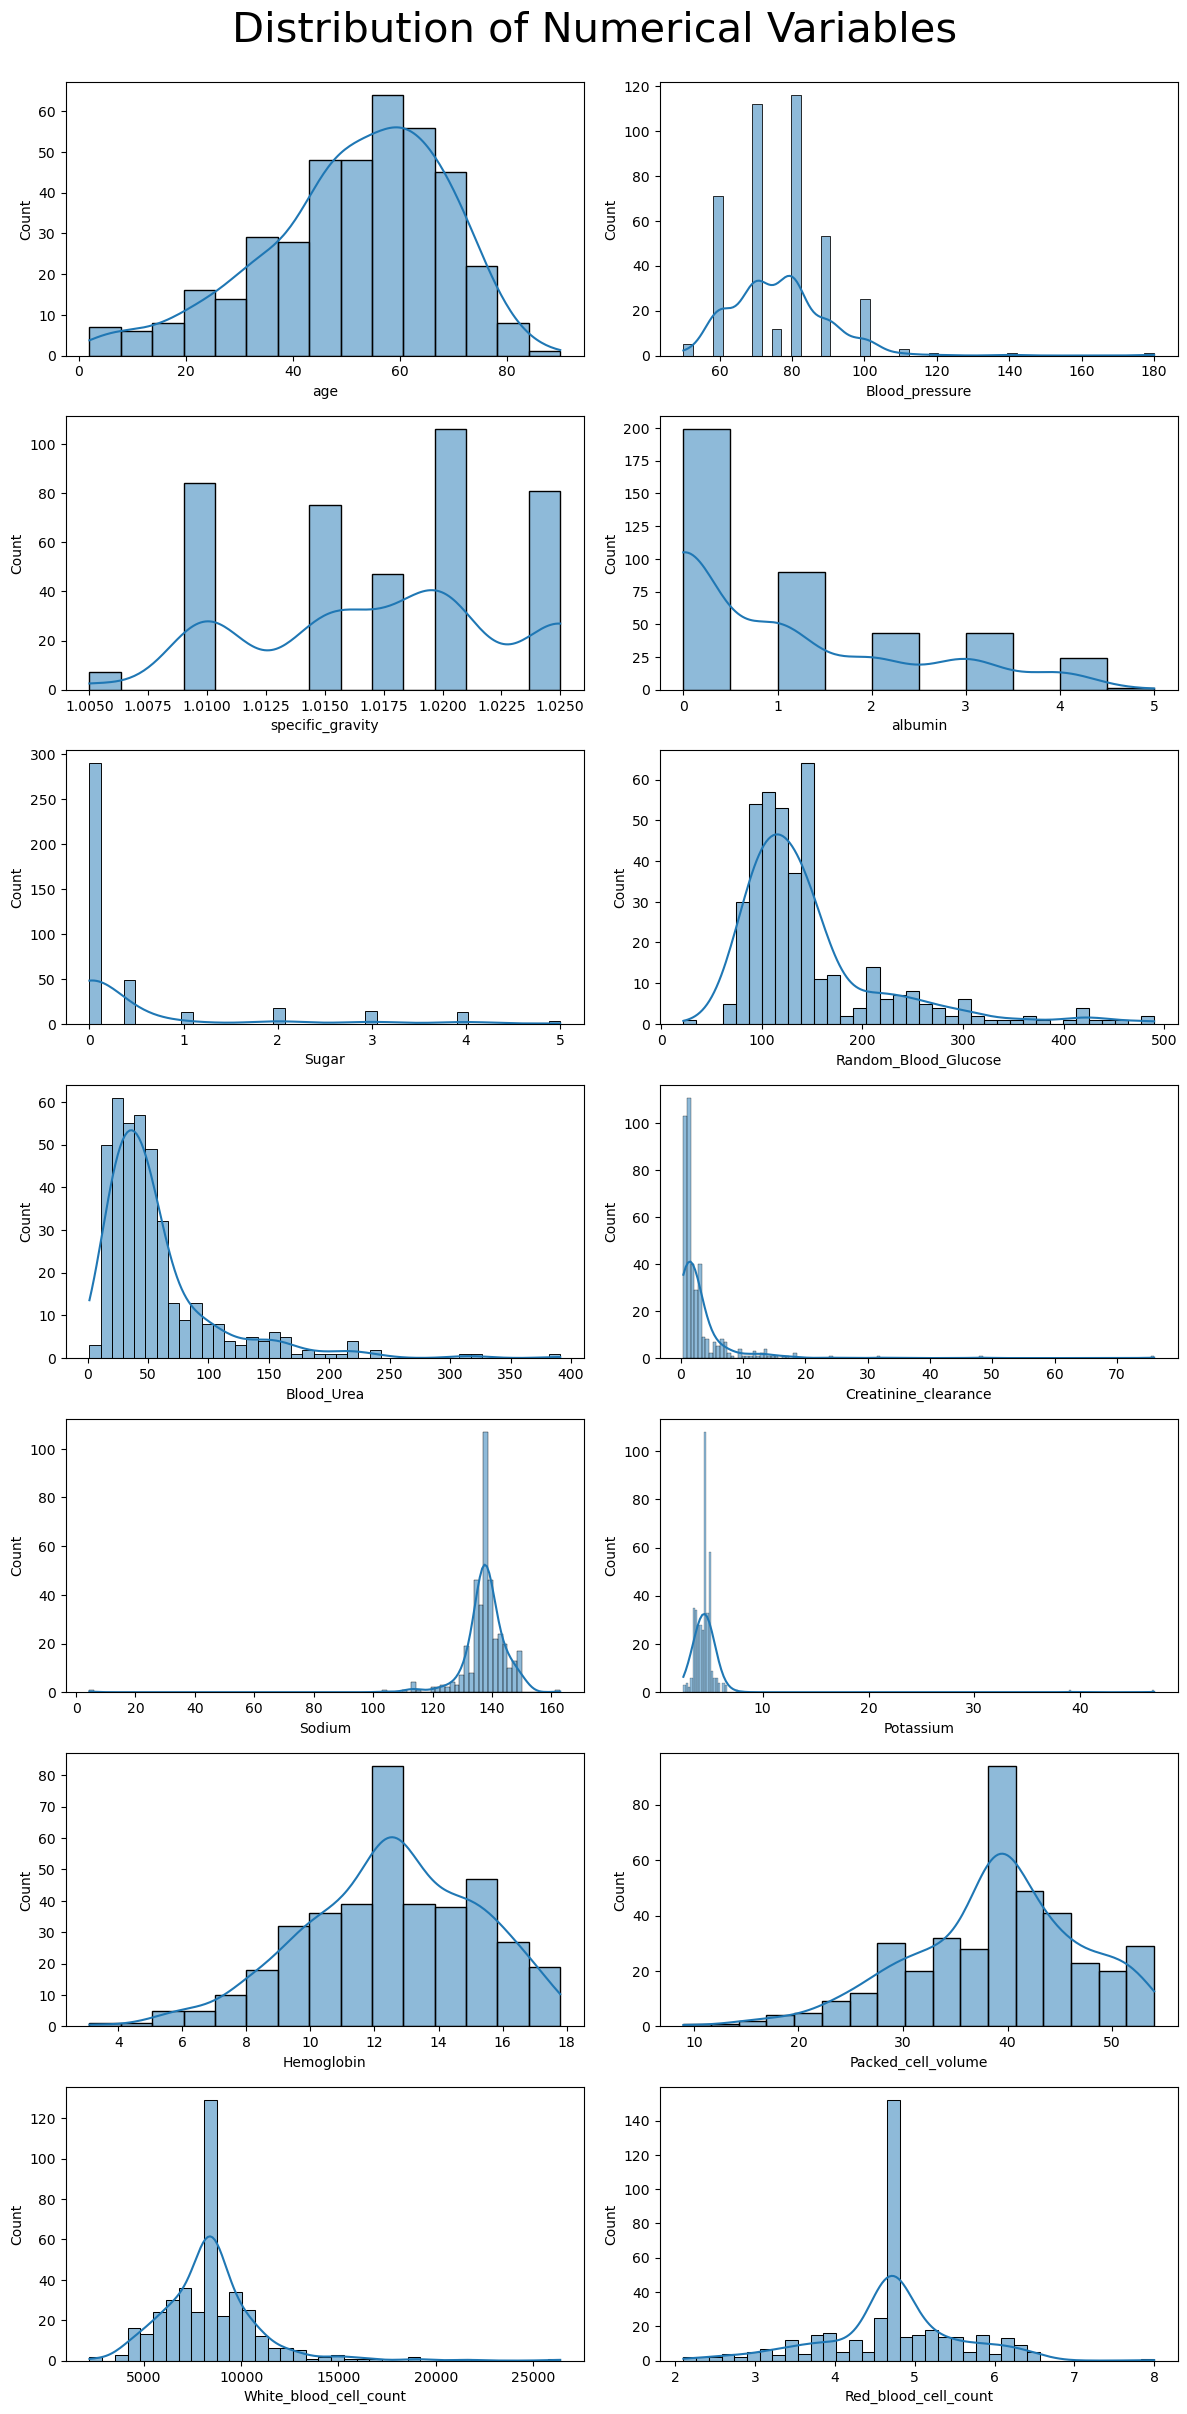

In [241]:
#Let's plot the distribution of numerical variables
plt.figure(figsize=(12,27))
plotnumber=1

for column in numerical_cols:
    if plotnumber <=len(numerical_cols):
        ax=plt.subplot(8,2,plotnumber)
        sns.histplot(x=df[column], kde=True,edgecolor="black")
        plt.xlabel(column)

        plotnumber +=1
plt.suptitle("Distribution of Numerical Variables", fontsize=30,y=1)
plt.tight_layout()
plt.show()


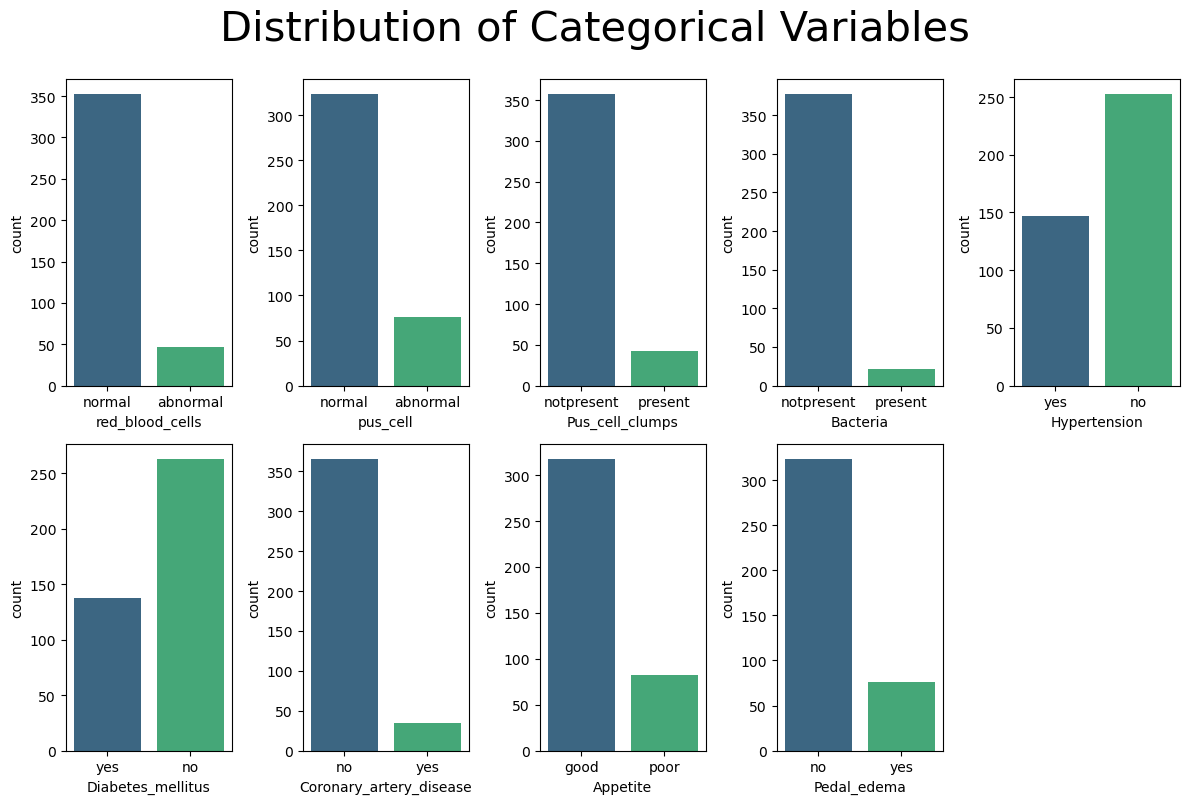

In [243]:
#Let's plot the distribution of categorical variables
plt.figure(figsize=(12,8))
plotnumber=1

for column in categorical_cols:
    if plotnumber <=len(column):
        ax=plt.subplot(2,5,plotnumber)
        sns.countplot(x=df[column],palette="viridis")
        plt.xlabel(column)
        plotnumber +=1
plt.suptitle("Distribution of Categorical Variables", fontsize=30,y=1)
plt.tight_layout()
plt.show()

We visualized the distribution of numerical variables using histograms.
We also visualized the distribution of categorical variables using count plots

## 5.Feature Engineering

In [247]:
#Encode the categorical variables using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in categorical_cols:
    df[column]=le.fit_transform(df[column])
    
#Lets round the values to 1 decimal place for better readability
df=df.round(1)
df

,age,Blood_pressure,specific_gravity,albumin,Sugar,red_blood_cells,pus_cell,Pus_cell_clumps,Bacteria,Random_Blood_Glucose,...,Packed_cell_volume,White_blood_cell_count,Red_blood_cell_count,Hypertension,Diabetes_mellitus,Coronary_artery_disease,Appetite,Pedal_edema,Anemia,Class
id,,,,,,,,,,,,,,,,,,,,,
0,48,80.0,1.0,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7,50.0,1.0,4.0,0.0,1,1,0,0,148.0,...,38.0,6000.0,4.7,0,0,0,0,0,0,0
2,62,80.0,1.0,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.7,0,1,0,1,0,1,0
3,48,70.0,1.0,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51,80.0,1.0,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,1.0,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42,70.0,1.0,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12,80.0,1.0,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1


Categorical variables were encoded using 'LabelEncoder' to convert them to numerical variables

In [250]:
# Separation of features (X) and target variable (y)
X=df.drop("Class",axis=1)
y=df["Class"]

# Spliting the dataset into 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Initialization of StandardScaler to normalize and transform the features 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)



### Model Selection: Why Random Forest Classifier?
A Random Forest Classifier is chosen for this project due to its suitability for CKD prediction:
- **Handles Complex Relationships**: Captures non-linear interactions between features like `albumin` and `specific_gravity`.
- **Robust to Noise and Outliers**: Reduces the impact of noisy medical data (e.g., extreme `Blood_Urea` values).
- **Feature Importance Insights**: Identifies key predictors (e.g., `Creatinine_clearance`) for medical insights.
- **Good Generalization**: Minimizes overfitting with ensemble techniques, ideal for the 80/20 train-test split.
- **Works Well with Mixed Data**: Effectively processes numerical and categorical features after preprocessing.
- **High Accuracy**: Balances precision and recall for binary classification (CKD vs. no CKD).

This makes Random Forest a practical and powerful choice for this analysis.

## 6.Model Training and Evaluation

In [254]:
# Training the model on the training data
model=RandomForestClassifier(random_state=42)
model.fit(X_train_scaled,y_train)

# Make predictions on the test set
y_pred=model.predict(X_test_scaled)


#Generating accuracy score, classification report and confusion matrix
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy score:{accuracy:}")

cr=classification_report(y_test,y_pred)
print("classification report:")
print(cr)

cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(cm)

accuracy score:1.0
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

confusion matrix:
[[52  0]
 [ 0 28]]


A Random Forest Classifier was trained on the training data and the model's performance was evaluated using accuracy, classification report and confusion matrix.

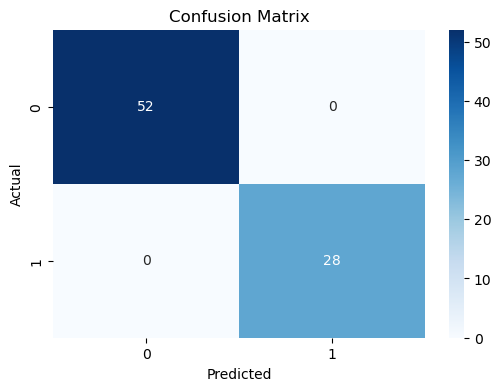

In [257]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7.Cross-Validation

In [260]:
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier()
scores=cross_val_score(model,X,y,cv=5,scoring="accuracy")
print("Cross validation accuracy scores:", scores)

Cross validation accuracy scores: [0.9875 1.     0.9375 0.9875 1.    ]


Cross-validation scores show the model performance across different subsets of data.The high accuracy indicate that the model is robust and generalizes well to unseen data.

## 8.Conclusion

-**Model Performance**: The Random Forest Classifier achieved **100% accuracy** on the test set, indicating excellent performance.
-**Cross-Validation**: The cross-validation results confirmed the model's robustness, with accuracy scores consistently close to 1.0.
-**Future Work**:
    -Explore other machine learning models to compare performance.
    -Perform hyperparameter tuning to optimize the model further.
    -Validate the model on a larger, more diverse dataset to ensure it's reliability in real-world scenarios.